# CODE TO PERFORM SIMPLE LINEAR REGRESSION ON FUEL CONSUMPTION DATASET


# PROBLEM STATEMENT

- You have been hired as a consultant to a major Automotive Manufacturer and you have been tasked to develop a model to predict the impact of increasing the vehicle horsepower (HP) on fuel economy (Mileage Per Gallon (MPG)). You gathered the data:
- Data set:
    - Independant variable X: Vehicle Horse Power 
    - Dependant variable Y: Mileage Per Gallon (MPG) 

# STEP #1: LIBRARIES IMPORT


In [2]:
!pip install --upgrade seaborn
!pip install --upgrade pandas


# STEP #2: IMPORT DATASET

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [5]:
df=pd.read_csv('FuelEconomy.csv')
df

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739
...,...,...
95,162.810542,27.418661
96,266.869640,15.989945
97,243.831211,19.253375
98,140.959803,29.515593


In [6]:
df.tail()

,Horse Power,Fuel Economy (MPG)
95,162.810542,27.418661
96,266.869640,15.989945
97,243.831211,19.253375
98,140.959803,29.515593
99,184.123053,25.196097


In [7]:
df.describe()

,Horse Power,Fuel Economy (MPG)
count,100.000000,100.000000
mean,213.676190,23.178501
std,62.061726,4.701666
min,50.000000,10.000000
25%,174.996514,20.439516
50%,218.928402,23.143192
75%,251.706476,26.089933
max,350.000000,35.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Horse Power         100 non-null    float64
 1   Fuel Economy (MPG)  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


# STEP#3: VISUALIZE DATASET

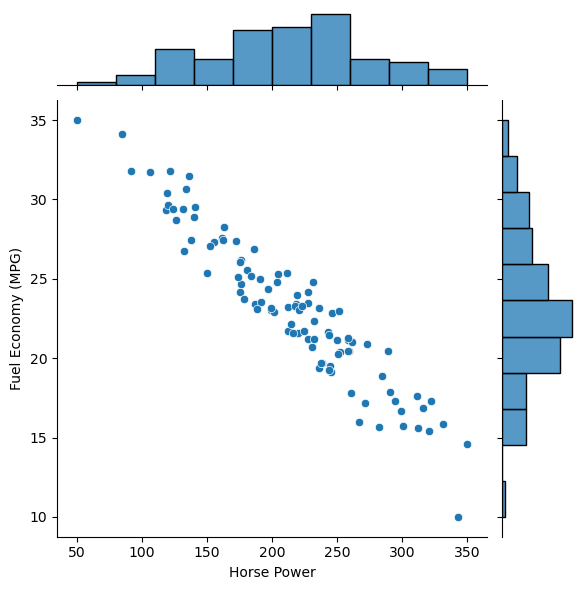

In [12]:

sns.jointplot(x='Horse Power',y='Fuel Economy (MPG)',data=df)

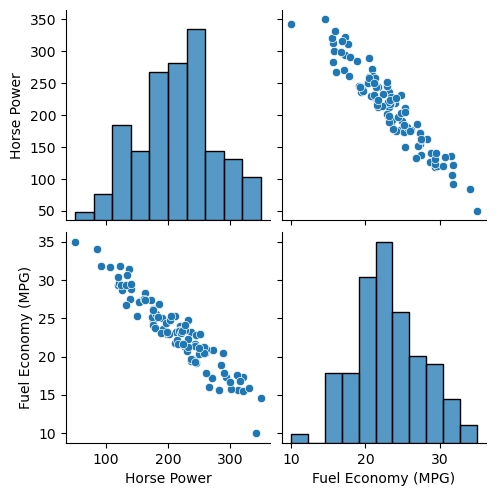

In [13]:
sns.pairplot(df)

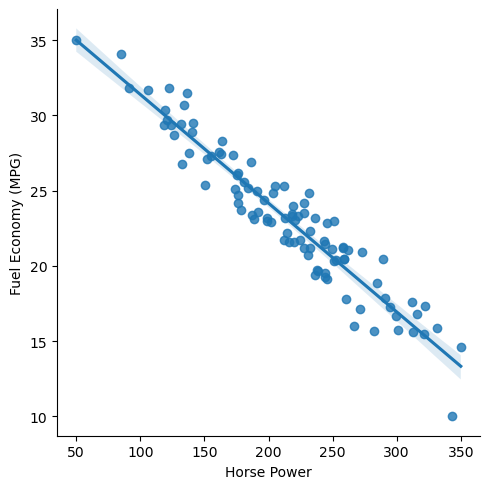

In [16]:
sns.lmplot(x='Horse Power',y='Fuel Economy (MPG)',data=df)

# STEP#4: CREATE TESTING AND TRAINING DATASET

In [17]:
X=df['Horse Power']

In [18]:
y=df['Fuel Economy (MPG)']

In [19]:
X

0     118.770799
1     176.326567
2     219.262465
3     187.310009
4     218.594340
         ...    
95    162.810542
96    266.869640
97    243.831211
98    140.959803
99    184.123053
Name: Horse Power, Length: 100, dtype: float64

In [20]:
y

0     29.344195
1     24.695934
2     23.952010
3     23.384546
4     23.426739
        ...    
95    27.418661
96    15.989945
97    19.253375
98    29.515593
99    25.196097
Name: Fuel Economy (MPG), Length: 100, dtype: float64

In [31]:
X=np.array(X)
y=np.array(y)

In [46]:
X = X.reshape(-1,1)
print(X.shape)

# y = y.reshape(-1,1)
# print(y.shape)

(100, 1)


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

# STEP#5: TRAIN THE MODEL

In [49]:
X_train.shape

(75, 1)

In [50]:
X_test.shape

(25, 1)

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
regressor=LinearRegression(fit_intercept=True)

In [53]:
regressor.fit(X_train,y_train)

LinearRegression()

In [56]:
print('linear Regression coefficient (m) :', regressor.coef_)
print('linear Regression coefficient (b) :', regressor.intercept_)

linear Regression coefficient (m) : [[-0.06973593]]
linear Regression coefficient (b) : [38.19771422]


# STEP#6: TEST THE MODEL 

In [57]:
y_predict=regressor.predict(X_test)
y_predict

array([[29.91512268],
       [31.82104281],
       [21.05520074],
       [19.93721506],
       [22.98781513],
       [19.58731299],
       [26.84397046],
       [29.68713066],
       [22.80553483],
       [20.71427002],
       [27.35967977],
       [23.40790728],
       [26.8063275 ],
       [29.55843043],
       [22.90724336],
       [23.11514422],
       [25.96959553],
       [17.91242621],
       [21.62336172],
       [14.28483038],
       [28.55569517],
       [22.12618618],
       [27.57359545],
       [19.26848256],
       [22.84893569]])

In [58]:
y_test

array([[29.34419493],
       [31.80670649],
       [22.84971109],
       [21.05039889],
       [23.29937173],
       [15.98994481],
       [27.41866055],
       [31.79661213],
       [23.05917995],
       [20.2917659 ],
       [27.29492955],
       [21.72625199],
       [28.28951641],
       [29.3933298 ],
       [23.95201001],
       [21.59562606],
       [26.05708471],
       [17.87326587],
       [19.72346154],
       [10.        ],
       [27.47341504],
       [20.71572205],
       [27.09441098],
       [17.16358348],
       [21.58264283]])

Text(0.5, 1.0, 'HP vs MPG (Training dataset')

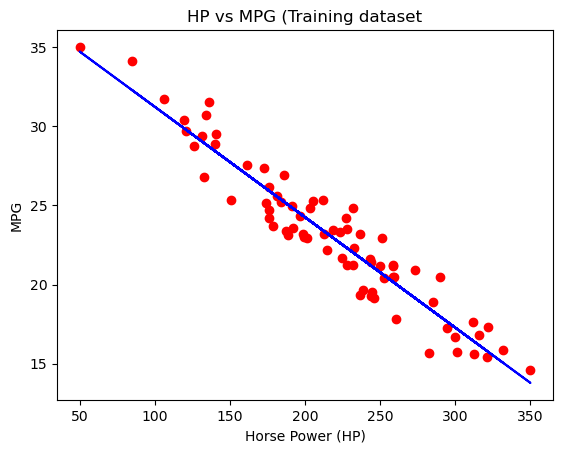

In [60]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.ylabel('MPG')
plt.xlabel('Horse Power (HP)')
plt.title('HP vs MPG (Training dataset')

Text(0.5, 1.0, 'HP vs MPG (Training dataset')

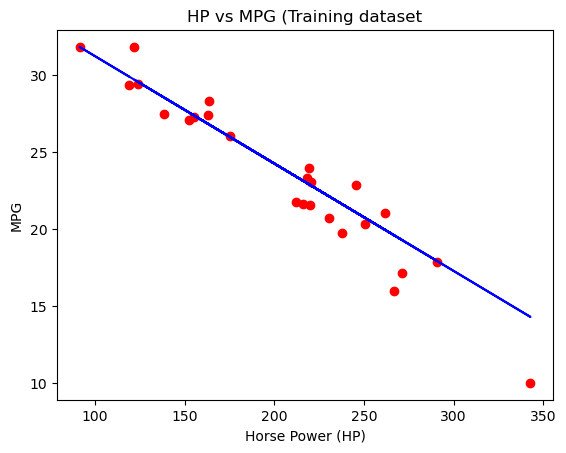

In [61]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,regressor.predict(X_test),color='blue')
plt.ylabel('MPG')
plt.xlabel('Horse Power (HP)')
plt.title('HP vs MPG (Training dataset')

In [64]:
HP=[[200]]
y_predict=regressor.predict(HP)
y_predict

array([[24.25052917]])